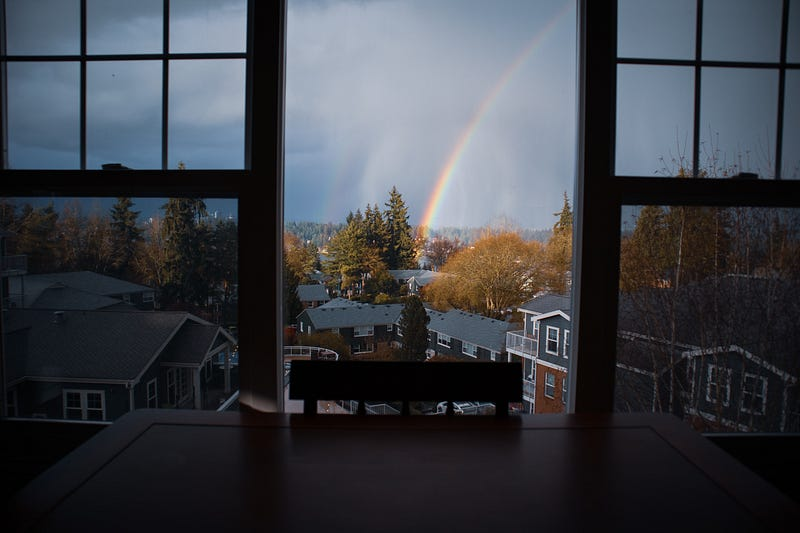

# Regression Analysis Project

**Authors:** Clara Giurgiu, Stephanie Ciaccia

## Overview
Our company prides itself in using technology as a way to improve and maximize company profitability.  We look at historical data on home sales and run statistical analyses and linear regressions to decide on the most crutial parameters for the properties we want to invest in.
We will be specifically using linear regression to look at the features that most accurately affect sale prices.

## Business Problem
We are a residential real estate investment firm that purchases homes around the US. We are expanding into the King County, Washington market. Our excecutives need guidance to navigate the new market. 

## Data Understanding
We have sourced data on home sales in king County, WA. One of our datasets was pulled from King County's official website and consists of data from 2021-2022 with over 30 thousands home attributes and selling prices. 

In [2]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# importing King County website data and looking at first 5 rows.
kc_data = pd.read_csv('../Data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

The data set contains slightly over 30,000 entries and 25 rows of information on home sales in King County, Washington, USA. 
15 out of the 25 columns are numeric and 10 contain string values. 
We can see that there are very few nulls in heat_source and sewer_system colums. 
The target column, price, does not have any nulls and is in the correct format (float). 

In [5]:
# removing scientific notation, setting sig figs and looking at stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4538103795.03,1108535.84,3.41,2.33,2112.42,16723.60,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2882587298.12,896385.66,0.98,0.89,974.04,60382.60,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2064175145.00,648000.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3874010800.00,860000.00,3.00,2.50,1920.00,7480.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,1300000.00,4.00,3.00,2619.50,10579.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


The price column ranges from \\$27K to $30M which could be indicative of outliers. 
Number of bedrooms ranges from 0 to 13, bathrooms from 0 to 10.5.
The min sqft_living is 3 which seems odd for a home and could be an incorrect entry.

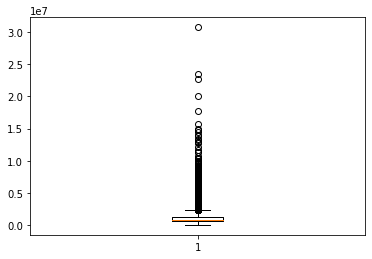

In [6]:
plt.boxplot(x='price',data=kc_data);


It does look like there is one data point that is vastly different from the rest and will be possibly removed for a more accurate analysis. 

In [7]:
# looking at more information on the outlier by filtering prices above 25M which is the maximun for most of the values
kc_data.loc[kc_data['price'] > 25000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
23470,5026900270,11/4/2021,30750000.00,1,3.50,2040,50705,2.00,YES,NO,...,PUBLIC,2000,410,0,890,1989,0,"1620 Lake Washington Boulevard, Seattle, Washi...",47.62,-122.28


The outlier at \$30M looks strange compared to the rest of the entries. It has only 1 bedroom, relatively small square footage

In [8]:
kc_data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

As seen above, only to columns have nulls, we will be dropping the rows as it will not significantly affect the 30K + dataset. 

## Data Preparation


In [9]:
# dropping null values, saving in place
kc_data = kc_data.dropna()
kc_data.shape

(30111, 25)

In [10]:
# sanity check
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

After dropping null values, we still have a substantial amount of data to work with.

In [11]:
# converting date column to date time for analysis
kc_data['date'] = pd.to_datetime(kc_data['date'])
kc_data.describe(datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,30111.00,30111,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,2021-11-21 01:16:22.405101312,1108970.65,3.42,2.34,2113.34,16648.80,1.54,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32
min,1000055.00,2021-06-10 00:00:00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2070850032.50,2021-08-18 00:00:00,649236.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3876000200.00,2021-11-03 00:00:00,860000.00,3.00,2.50,1920.00,7477.00,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7287100141.00,2022-03-07 00:00:00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9904000012.00,2022-06-09 00:00:00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07
std,2882235761.32,NaN,896515.83,0.98,0.89,973.45,59933.03,0.57,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72


We are working with data from June 2021 to June 2022.

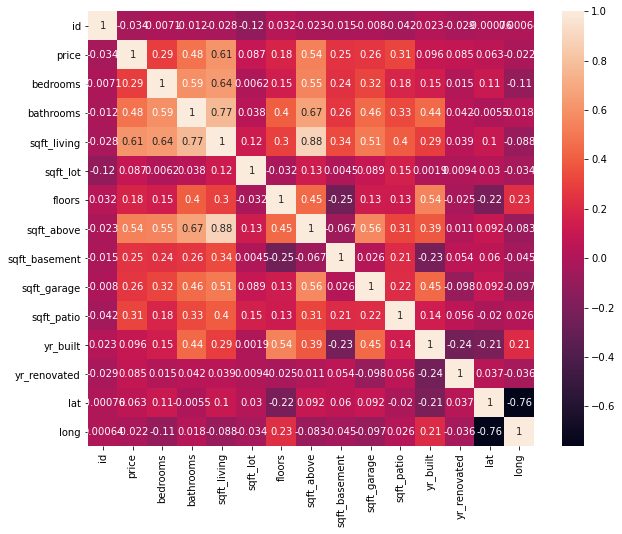

In [12]:
# looking at corr of numeric variables
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(kc_data.corr(), annot=True)
plt.show()

In [13]:
#saving for partner to use
stepth_analysis = kc_data
stepth_analysis.to_csv('../Data/steph.csv')

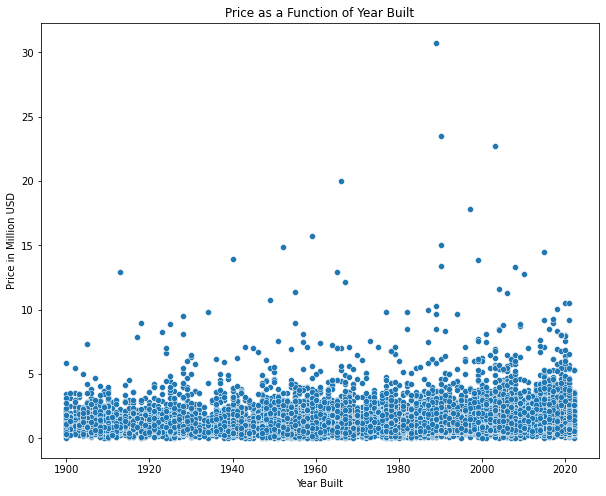

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=kc_data['price']/1000000, x=kc_data['yr_built'])
plt.xlabel('Year Built')
plt.ylabel('Price in Million USD')
plt.title('Price as a Function of Year Built');

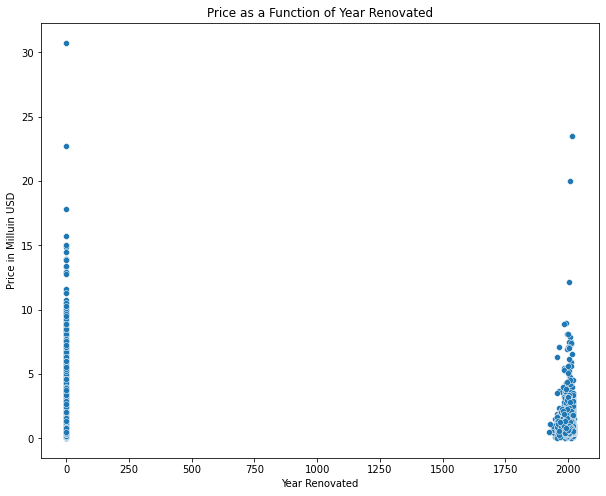

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=kc_data['price']/1000000, x=kc_data['yr_renovated'])
plt.xlabel('Year Renovated')
plt.ylabel('Price in Milluin USD')
plt.title('Price as a Function of Year Renovated');

The strongest positive correlation with price is sqft_living, followed by sqft_above, bathrooms, sqft_patio and bedrooms.
The least correlated ones are yr_built, yr_renovated and lat & long.

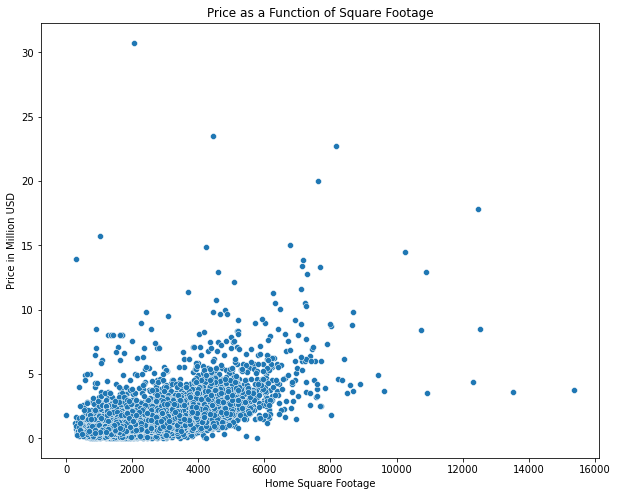

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=kc_data['price']/1000000, x=kc_data['sqft_living'])

plt.xlabel('Home Square Footage')
plt.ylabel('Price in Million USD')
plt.title('Price as a Function of Square Footage');

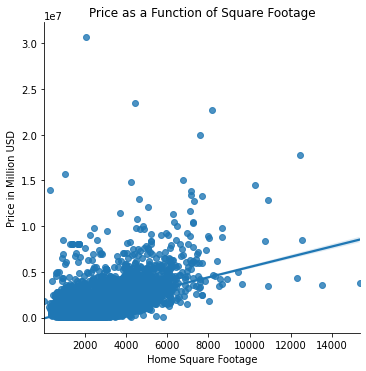

In [17]:

sns.lmplot(data=kc_data, x = 'sqft_living', y = 'price')
plt.xlabel('Home Square Footage')
plt.ylabel('Price in Million USD')
plt.title('Price as a Function of Square Footage');

Although small, we can see a positive trend between home square footage and prices.

In [18]:
# removing least correlated columns
kc_data = kc_data.drop(columns=['yr_built','yr_renovated', 'lat', 'long'])
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,address
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,"2102 Southeast 21st Court, Renton, Washington ..."
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing..."
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,"8504 South 113th Street, Seattle, Washington 9..."
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington..."
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [19]:
# firltering homes where price is less than $25M
kc_data = kc_data.loc[kc_data['price'] <= 25000000]
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
count,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00,30110.00
mean,4539155224.16,1107986.23,3.42,2.34,2113.35,16647.67,1.54,1810.38,476.62,330.49,217.43
std,2882282253.69,880105.69,0.98,0.89,973.47,59933.70,0.57,877.74,579.81,285.72,245.28
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00
25%,2070475023.75,649118.00,3.00,2.00,1420.00,4850.00,1.00,1180.00,0.00,0.00,40.00
50%,3876000160.00,860000.00,3.00,2.50,1920.00,7476.00,1.50,1560.00,0.00,400.00,150.00
75%,7287100145.50,1300000.00,4.00,3.00,2620.00,10566.75,2.00,2270.00,940.00,510.00,320.00
max,9904000012.00,23500000.00,13.00,10.50,15360.00,3253932.00,4.00,12660.00,8020.00,3580.00,4370.00


There is an incorrect entry based on the .describe() showing sqft_living of 3 and according to reasearch, it is listed on "Redfin.com" as 3,325 sqft. https://www.redfin.com/WA/Duvall/31072-NE-165th-St-98019/home/22591192. Several other entries followed the same pattern and we decided to remove entries with sqft_living less than 500.

In [20]:
kc_data = kc_data.loc[kc_data['sqft_living'] > 500]

In [21]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30039 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30039 non-null  int64         
 1   date           30039 non-null  datetime64[ns]
 2   price          30039 non-null  float64       
 3   bedrooms       30039 non-null  int64         
 4   bathrooms      30039 non-null  float64       
 5   sqft_living    30039 non-null  int64         
 6   sqft_lot       30039 non-null  int64         
 7   floors         30039 non-null  float64       
 8   waterfront     30039 non-null  object        
 9   greenbelt      30039 non-null  object        
 10  nuisance       30039 non-null  object        
 11  view           30039 non-null  object        
 12  condition      30039 non-null  object        
 13  grade          30039 non-null  object        
 14  heat_source    30039 non-null  object        
 15  sewer_system   3003

In [22]:
# exploring string columns
kc_data.describe(include='object')

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
count,30039,30039,30039,30039,30039,30039,30039,30039,30039
unique,2,2,2,5,5,12,7,4,29447
top,NO,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,"Avenue, 108 Foothill Blvd, Rancho Cucamonga, C..."
freq,29537,29268,24807,26504,18469,11688,20561,25711,38


Out of the 9 columns, we can separate the addresses to group by city.

In [23]:
kc_data['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
24539 Southeast 276th Court, Maple Valley, Washington 98038, United States       1
14821 Southeast Fairwood Boulevard, Renton, Washington 98058, United States      1
2641 271st Avenue Southeast, Issaquah, Washington 98029, United States           1
4122 24th Place South, Seattle, Washington 98108, United States                  1
13411 Southeast 241st Street, Kent, Washington 98042, United States              1
Name: address, Length: 29447, dtype: int64

Interestingly, it looks like there are entries for homes outside of Washington state. Will will filter out homes in WA only

In [24]:
# firltering homes that have "Washington" in the address
wa_only_df = kc_data[kc_data['address'].str.contains('Washington')]
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29136 non-null  int64         
 1   date           29136 non-null  datetime64[ns]
 2   price          29136 non-null  float64       
 3   bedrooms       29136 non-null  int64         
 4   bathrooms      29136 non-null  float64       
 5   sqft_living    29136 non-null  int64         
 6   sqft_lot       29136 non-null  int64         
 7   floors         29136 non-null  float64       
 8   waterfront     29136 non-null  object        
 9   greenbelt      29136 non-null  object        
 10  nuisance       29136 non-null  object        
 11  view           29136 non-null  object        
 12  condition      29136 non-null  object        
 13  grade          29136 non-null  object        
 14  heat_source    29136 non-null  object        
 15  sewer_system   2913

We now have 29,136 entries that are only in Washington state.

In [25]:
wa_only_df['address'].value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States          24
Northeast 201st Street, Woodinville, Washington 98072, United States      11
Interlake Avenue North, Seattle, Washington 98103, United States          11
26th Avenue, Seattle, Washington 98122, United States                      9
12006 31st Ave NE, Seattle, Washington 98125, United States                7
                                                                          ..
18319 Northeast 92nd Court, Redmond, Washington 98052, United States       1
225 L St SE, Auburn, Washington 98002, United States                       1
7525 1st Avenue Northeast, Seattle, Washington 98115, United States        1
4135 181st Avenue Southeast, Bellevue, Washington 98008, United States     1
13411 Southeast 241st Street, Kent, Washington 98042, United States        1
Name: address, Length: 28973, dtype: int64

We also want to isolate cities and zipcodes.

In [26]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['address'].str.split(',', expand=True)], axis=1)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,address,0,1,2,3,4,5
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [27]:
# Renaming address columns
wa_only_df.rename(columns={0:'street_name',1:'city',2:'state_zip'}, inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,address,street_name,city,state_zip,3,4,5
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None


In [28]:
# formatting to isolate by zipcode
wa_only_df = pd.concat([wa_only_df, wa_only_df['state_zip'].str.split(' ', expand=True)], axis=1,)
wa_only_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,street_name,city,state_zip,3,4,5,0,1,2
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None,,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None,,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None,,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None,,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None,,Washington,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,NO,NO,...,"4673 Eastern Avenue North, Seattle, Washington...",4673 Eastern Avenue North,Seattle,Washington 98103,United States,None,None,,Washington,98103
30151,194000695,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,NO,NO,...,"4131 44th Avenue Southwest, Seattle, Washingto...",4131 44th Avenue Southwest,Seattle,Washington 98116,United States,None,None,,Washington,98116
30152,7960100080,2022-05-27,800000.00,3,2.00,1620,3600,1.00,NO,NO,...,"910 Martin Luther King Jr Way, Seattle, Washin...",910 Martin Luther King Jr Way,Seattle,Washington 98122,United States,None,None,,Washington,98122
30153,2781280080,2022-02-24,775000.00,3,2.50,2570,2889,2.00,NO,NO,...,"17127 114th Avenue Southeast, Renton, Washingt...",17127 114th Avenue Southeast,Renton,Washington 98055,United States,None,None,,Washington,98055


In [29]:
# renaming state and zip columns in place
wa_only_df.rename(columns={1:'state', 2: 'zip_code'}, inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,address,street_name,city,state_zip,3,4,5,0,state,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,"2102 Southeast 21st Court, Renton, Washington ...",2102 Southeast 21st Court,Renton,Washington 98055,United States,None,None,,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,"11231 Greenwood Avenue North, Seattle, Washing...",11231 Greenwood Avenue North,Seattle,Washington 98133,United States,None,None,,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,"8504 South 113th Street, Seattle, Washington 9...",8504 South 113th Street,Seattle,Washington 98178,United States,None,None,,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,"4079 Letitia Avenue South, Seattle, Washington...",4079 Letitia Avenue South,Seattle,Washington 98118,United States,None,None,,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,"2193 Northwest Talus Drive, Issaquah, Washingt...",2193 Northwest Talus Drive,Issaquah,Washington 98027,United States,None,None,,Washington,98027


In [30]:
wa_only_df.drop(columns=['address', 'state_zip', 3, 4, 5, 0], inplace=True)
wa_only_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,NO,NO,...,Gas,PUBLIC,1180,0,0,40,2102 Southeast 21st Court,Renton,Washington,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,NO,NO,...,Oil,PUBLIC,1570,1570,0,240,11231 Greenwood Avenue North,Seattle,Washington,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,NO,NO,...,Gas,PUBLIC,1580,1580,0,0,8504 South 113th Street,Seattle,Washington,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,NO,NO,...,Gas,PUBLIC,1090,1070,200,270,4079 Letitia Avenue South,Seattle,Washington,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,NO,NO,...,Electricity,PUBLIC,1120,550,550,30,2193 Northwest Talus Drive,Issaquah,Washington,98027


After formatting the address column to isolate by zipcode, we want to look into other columns that may not be useful in our analysis.

In [31]:
wa_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29136 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29136 non-null  int64         
 1   date           29136 non-null  datetime64[ns]
 2   price          29136 non-null  float64       
 3   bedrooms       29136 non-null  int64         
 4   bathrooms      29136 non-null  float64       
 5   sqft_living    29136 non-null  int64         
 6   sqft_lot       29136 non-null  int64         
 7   floors         29136 non-null  float64       
 8   waterfront     29136 non-null  object        
 9   greenbelt      29136 non-null  object        
 10  nuisance       29136 non-null  object        
 11  view           29136 non-null  object        
 12  condition      29136 non-null  object        
 13  grade          29136 non-null  object        
 14  heat_source    29136 non-null  object        
 15  sewer_system   2913

After separating address column, there are 4 nulls in the new column, zip_code that will have to be removed. We will also check that the formating was done properly on the new columns.

In [32]:
wa_only_df['city'].unique()

array([' Renton', ' Seattle', ' Issaquah', ' Shoreline', ' Burien',
       ' Kent', ' Federal Way', ' Duvall', ' Auburn', ' Bellevue',
       ' Maple Valley', ' Woodinville', ' Redmond', ' Medina',
       ' Lake Forest Park', ' SeaTac', ' Clyde Hill', ' North Bend',
       ' Bothell', ' Kirkland', ' Des Moines', ' Newcastle',
       ' Mercer Island', ' Carnation', ' Sammamish', ' Snoqualmie',
       ' Enumclaw', ' Covington', ' Fall City', ' Normandy Park',
       ' Algona', ' Kenmore', ' Tukwila', ' Black Diamond', ' Pacific',
       ' Vashon', ' Hunts Point', ' Ravensdale', ' Dilworth',
       ' Beaux Arts', ' Preston', ' Skykomish', ' Milton', ' Monroe',
       ' Ames Lake', ' Yarrow Point', ' Snohomish', ' Lakeland North',
       ' Tulalip', ' Hobart', ' White Center', ' Washington',
       ' 35th Ave SW & SW Holden', ' Spanaway', ' Baring', ' Arlington',
       ' Eatonville', ' Puyallup', ' Vancouver', ' Spokane',
       ' Marysville', ' Union Hill-Novelty Hill', ' Clarkston',
   

We noticed that the city column values had a whitespace in front and there are a few that look like street addresses. 

In [33]:
# removing space in front of city name
wa_only_df['city'] = wa_only_df['city'].str.strip()

In [34]:
cities = wa_only_df['city'].unique()
print(sorted(cities))

['2301 NE Northlake Way', '35th Ave SW & SW Holden', 'Algona', 'Ames Lake', 'Arlington', 'Auburn', 'Baring', 'Beaux Arts', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clarkston', 'Clyde Hill', 'Cottage Lake', 'Covington', 'Dash Point', 'Des Moines', 'Dilworth', 'Duvall', 'Eatonville', 'Enumclaw', 'Fairwood', 'Fall City', 'Federal Way', 'Hobart', 'Hunts Point', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Lakeland North', 'Maple Valley', 'Marysville', 'Medina', 'Mercer Island', 'Milton', 'Monroe', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Puyallup', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snohomish', 'Snoqualmie', 'Snoqualmie Pass', 'Spanaway', 'Spokane', 'Tukwila', 'Tulalip', 'Union Hill-Novelty Hill', 'Vancouver', 'Vashon', 'Washington', 'White Center', 'Woodinville', 'Yarrow Point']


In [35]:
wa_only_df.loc[wa_only_df['city'] == '2301 NE Northlake Way']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
19560,4083306403,2022-02-22,1205000.00,3,2.00,1400,1445,2.00,NO,NO,...,Electricity,PUBLIC,1140,510,250,460,Sunnyside Avenue North Boat Ramp,2301 NE Northlake Way,Seattle,None


In [36]:
wa_only_df.loc[wa_only_df['city'] == '35th Ave SW & SW Holden']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
4818,139000091,2022-04-06,1180000.00,2,2.50,1260,700,2.00,NO,NO,...,Electricity,PUBLIC,840,420,0,390,35th Ave SW & SW Holden Bus Stop,35th Ave SW & SW Holden,Seattle,None
17496,139000123,2021-10-20,1200000.00,3,2.50,1310,1251,2.00,NO,NO,...,Gas,PUBLIC,1100,390,180,520,35th Ave SW & SW Holden Bus Stop,35th Ave SW & SW Holden,Seattle,None
26031,139000125,2022-01-25,1030000.00,3,2.50,1360,2227,2.00,NO,NO,...,Gas,PUBLIC,960,400,0,400,35th Ave SW & SW Holden Bus Stop,35th Ave SW & SW Holden,Seattle,None


After a quick search at the cities that have addresses one is a boat and 3 other entries point to a bus stop, we will remove these from out set.
Additionally, the cities list may reflect names of further jurisdiction within the cities. For example, 'Ames Lake' is located in the city of 'Carnation. This can potentially skew an analysis if looking into the cities. We will try to avoid that. 

In [37]:
# dropping rows with incorrect cities
# thought of replacing it but it might need more code
wa_only_df = wa_only_df.drop([19560,4818,17496,26031])

In [38]:
wa_only_df['zip_code'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', '98387', '15301', '98251', '98223',
       '98338', '98224', '98372', '98663', '99202', '99403', '98422',
       '99203', '99223', '98270'], dtype=object)

In [39]:
wa_only_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
street_name      0
city             0
state            0
zip_code         0
dtype: int64

In [40]:
wa_only_df = wa_only_df.dropna()

In [41]:
# checking that None was removed
wa_only_df['zip_code'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '98092', '98103', '98006',
       '98136', '98007', '98038', '98057', '98077', '98126', '98053',
       '98039', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '98198',
       '98125', '98001', '98112', '98034', '98056', '98059', '98005',
       '98040', '98014', '98106', '98029', '98122', '98003', '98117',
       '98042', '98119', '98065', '98022', '98072', '98058', '98108',
       '98115', '98074', '98105', '98024', '98146', '98109', '98102',
       '98028', '98188', '98177', '98075', '98010', '98148', '98047',
       '98032', '98070', '98051', '98288', '98354', '98272', '98296',
       '98271', '98050', '63090', '98387', '15301', '98251', '98223',
       '98338', '98224', '98372', '98663', '99202', '99403', '98422',
       '99203', '99223', '98270'], dtype=object)

In [42]:
wa_only_df.loc[wa_only_df['zip_code'] == '15301']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
7064,597000591,2022-04-13,715000.00,3,2.50,1530,1101,2.00,NO,NO,...,Gas,PUBLIC,1040,490,0,375,Beacon Ave,Washington,Pennsylvania,15301


In [43]:
wa_only_df.loc[wa_only_df['zip_code'] == '63090']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,street_name,city,state,zip_code
4137,2902200584,2021-12-11,750000.00,2,2.00,880,892,3.00,NO,NO,...,Electricity,PUBLIC,880,0,0,320,2213 Highway a,Washington,Missouri,63090
10445,1959701116,2022-03-17,1325000.00,3,2.00,1440,980,2.00,NO,NO,...,Electricity,PUBLIC,960,480,0,510,2708 Highway a,Washington,Missouri,63090
18767,2902200797,2021-09-07,1224000.00,3,2.00,1640,1040,3.00,NO,NO,...,Electricity,PUBLIC,1640,0,0,580,2368 Highway a,Washington,Missouri,63090


In [44]:
wa_only_df = wa_only_df.drop([7064,4137,10445,18767])

In [45]:
wa_only_df['zip_code'].value_counts()

98042    991
98038    856
98115    759
98103    757
98117    743
        ... 
99223      1
98270      1
98422      1
98296      1
99203      1
Name: zip_code, Length: 92, dtype: int64

In [46]:
# Condition Column
wa_only_df['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [47]:
cond = wa_only_df.groupby('condition').mean()
cond

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
condition,,,,,,,,,,,
Average,4568010527.94,1141344.49,3.45,2.43,2220.82,16280.85,1.66,1960.54,440.69,360.53,209.95
Fair,4044811176.29,791033.09,2.93,1.55,1527.28,45116.11,1.22,1360.70,529.14,140.88,129.46
Good,4526894602.79,1054346.40,3.43,2.18,2014.52,18352.00,1.33,1664.57,525.49,322.06,227.59
Poor,4109177712.07,692551.57,2.88,1.45,1375.89,43819.38,1.23,1203.21,531.07,70.89,165.89
Very Good,4438668397.43,1127194.82,3.49,2.29,2030.85,15907.95,1.27,1574.64,596.86,266.73,233.69


We can see the average price and other features of homes based on their condition at the time of sale.

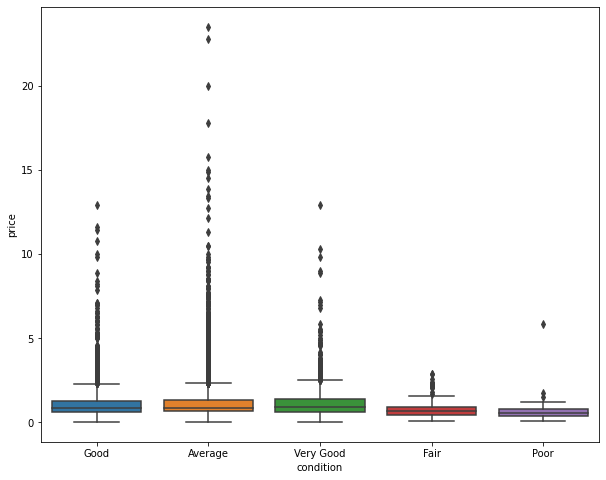

In [48]:
# price vs condition bar
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=wa_only_df['price']/1000000, x=wa_only_df['condition']);

In [49]:
wa_only_df['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

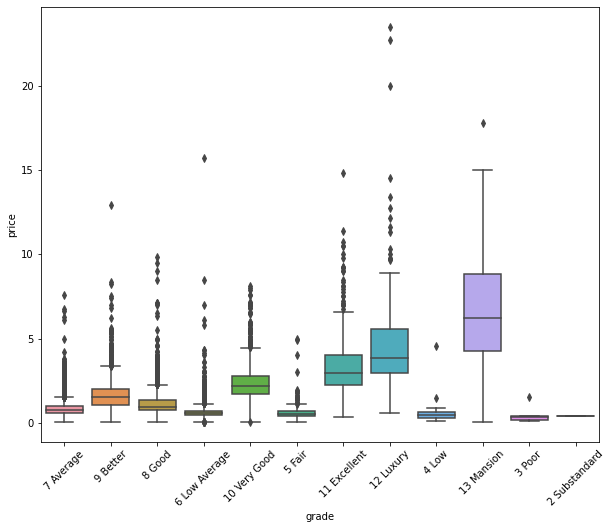

In [50]:
# grade vs price 
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(y=wa_only_df['price']/1000000, x=wa_only_df['grade'])
plt.xticks(rotation = 45);

After cleaning data, we want to look at columns most correlated to the target, price.

In [51]:
house_corrs = wa_only_df.corr()['price'].map(abs).sort_values(ascending=False)
house_corrs

price           1.00
sqft_living     0.63
sqft_above      0.56
bathrooms       0.50
sqft_patio      0.32
bedrooms        0.30
sqft_garage     0.28
sqft_basement   0.25
floors          0.20
sqft_lot        0.09
id              0.03
Name: price, dtype: float64

We will used to top 9 most positively correlated columns for our features in the models.

In [52]:
# removing more columns that we will not be using in analysis
wa_only_df = wa_only_df.drop(columns=['id', 'sqft_lot', 'nuisance', 'greenbelt', 'heat_source', 'sewer_system', 'street_name', 'state'])
wa_only_df

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,1.50,NO,NONE,Good,8 Good,1600,1130,0,210,Seattle,98103
30151,2021-06-16,1313000.00,3,2.00,2020,2.00,NO,FAIR,Average,7 Average,2020,0,0,520,Seattle,98116
30152,2022-05-27,800000.00,3,2.00,1620,1.00,NO,NONE,Average,7 Average,940,920,240,110,Seattle,98122
30153,2022-02-24,775000.00,3,2.50,2570,2.00,NO,NONE,Average,8 Good,1830,740,480,100,Renton,98055


We souced data with mortgage rates per month and will merge to our clean dataset so look for relationships between mortgage fluctuations and prices.

In [53]:
# importing mortgage dataset
mortg = pd.read_csv('../Data/monthy_mortgage_rates_cleaned.csv')
mortg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     279 non-null    int64  
 1   month          279 non-null    object 
 2   mortgage_rate  279 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.7+ KB


When loading, it looks like an additional column is now in the dataset that is not relevant to our analysis so it will be removed. The month column should contain Month and Year of the reported mortgage rate and additional formating will be needed to be able to merge it with clean dataset. 

In [54]:
# dropping extra column
mortg = mortg.drop(columns='Unnamed: 0')
mortg.head()

,month,mortgage_rate
0,January 2000,8.21
1,February 2000,8.32
2,March 2000,8.24
3,April 2000,8.15
4,May 2000,8.52


In [55]:
# formatting month column to datetime
mortg['month'] = pd.to_datetime(mortg['month'])

In [56]:
mortg.head()

,month,mortgage_rate
0,2000-01-01,8.21
1,2000-02-01,8.32
2,2000-03-01,8.24
3,2000-04-01,8.15
4,2000-05-01,8.52


In [57]:
#changing date to month and year
mortg['month'] = mortg['month'].dt.strftime('%B %Y')
mortg.head()

,month,mortgage_rate
0,January 2000,8.21
1,February 2000,8.32
2,March 2000,8.24
3,April 2000,8.15
4,May 2000,8.52


In [58]:
# copying cleaned king county dataset to merge with mortgage rates
sales_df = wa_only_df
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,2022-05-24,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,2021-12-13,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,2021-09-29,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,2021-12-14,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,2021-08-24,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027


In [59]:
# changing format of date column to match before merge
sales_df['date'] = sales_df['date'].dt.strftime('%B %Y')
sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,city,zip_code
0,May 2022,675000.00,4,1.00,1180,1.00,NO,NONE,Good,7 Average,1180,0,0,40,Renton,98055
1,December 2021,920000.00,5,2.50,2770,1.00,NO,AVERAGE,Average,7 Average,1570,1570,0,240,Seattle,98133
2,September 2021,311000.00,6,2.00,2880,1.00,NO,AVERAGE,Average,7 Average,1580,1580,0,0,Seattle,98178
3,December 2021,775000.00,3,3.00,2160,2.00,NO,AVERAGE,Average,9 Better,1090,1070,200,270,Seattle,98118
4,August 2021,592500.00,2,2.00,1120,2.00,NO,NONE,Average,7 Average,1120,550,550,30,Issaquah,98027


In [60]:
# add mortgage_rate column from mortgage df to cleaned df based on the condition if date=month
sales_df['mortgage_rate'] = sales_df.apply(lambda x: mortg.loc[mortg['month'] == x['date'],
                                                               'mortgage_rate'].values[0] 
                                           if mortg['month'].isin([x['date']]).any() else None, axis=1)

In [61]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29128 non-null  object 
 1   price          29128 non-null  float64
 2   bedrooms       29128 non-null  int64  
 3   bathrooms      29128 non-null  float64
 4   sqft_living    29128 non-null  int64  
 5   floors         29128 non-null  float64
 6   waterfront     29128 non-null  object 
 7   view           29128 non-null  object 
 8   condition      29128 non-null  object 
 9   grade          29128 non-null  object 
 10  sqft_above     29128 non-null  int64  
 11  sqft_basement  29128 non-null  int64  
 12  sqft_garage    29128 non-null  int64  
 13  sqft_patio     29128 non-null  int64  
 14  city           29128 non-null  object 
 15  zip_code       29128 non-null  object 
 16  mortgage_rate  29128 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 5

<AxesSubplot:>

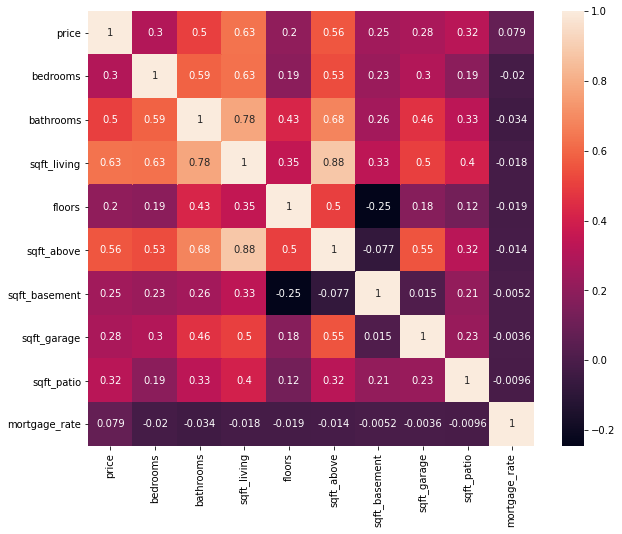

In [62]:
# looking at correlations
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(sales_df.corr(), annot=True)

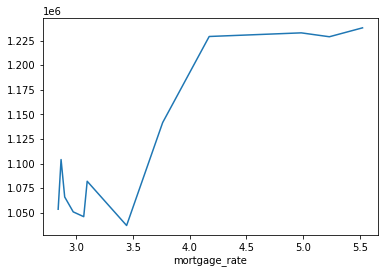

In [63]:
sales_df.groupby('mortgage_rate')['price'].mean().plot();

In [64]:
zip_group = sales_df.groupby('zip_code')['price'].median().sort_values(ascending=False)
top_zip = pd.DataFrame(zip_group.head(10))
top_zip

,price
zip_code,
98039,4300000.00
98004,3100000.00
98040,2384500.00
98270,2375000.00
98223,2077000.00
98005,1956000.00
98033,1850000.00
98075,1831000.00
98006,1650000.00


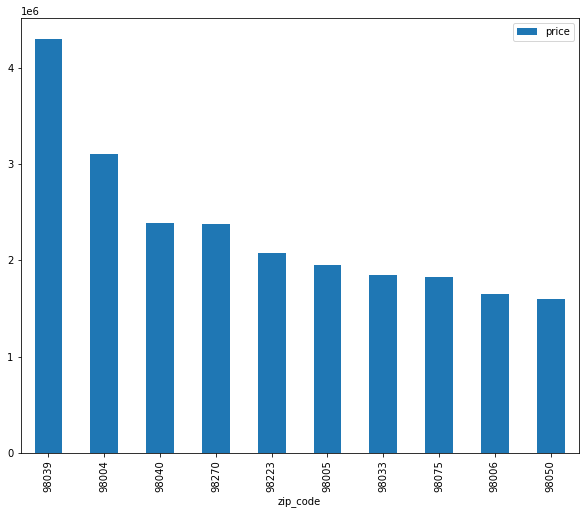

In [65]:
top_zip.plot(kind='bar', figsize=(10,8));

The zipcode with the highest median price is Media, WA. 

In [66]:
city_group = sales_df.groupby('city')['price'].median().sort_values(ascending=False)
top_city = pd.DataFrame(city_group.head(10))
top_city

,price
city,
Hunts Point,7400000.00
Medina,4300000.00
Clyde Hill,4150000.00
Yarrow Point,3200000.00
Marysville,2562500.00
Mercer Island,2384500.00
Beaux Arts,2100000.00
Preston,2097000.00
Arlington,2077000.00


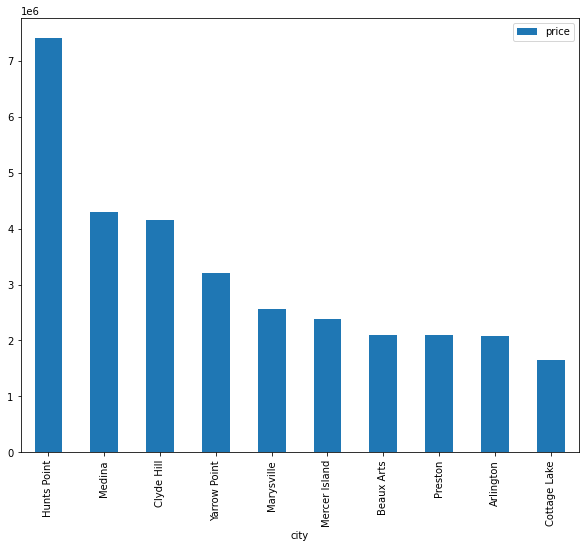

In [67]:
top_city.plot(kind='bar', figsize=(10,8));

In [68]:
cat_features = [feature for feature in sales_df.columns if sales_df[feature].dtypes=='O']
cat_features

['date', 'waterfront', 'view', 'condition', 'grade', 'city', 'zip_code']

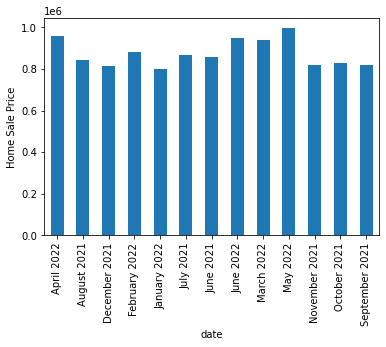

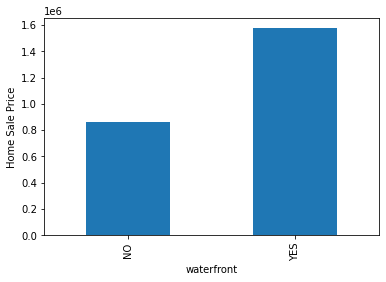

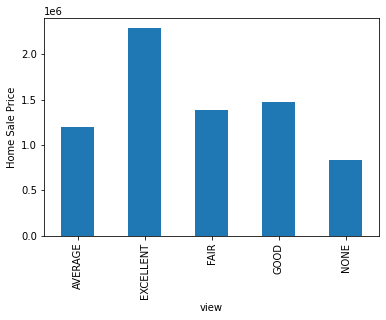

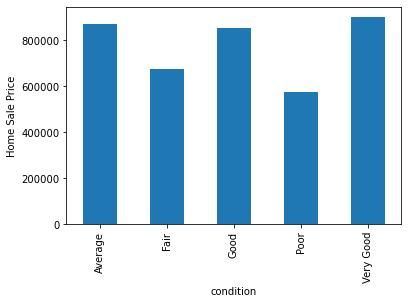

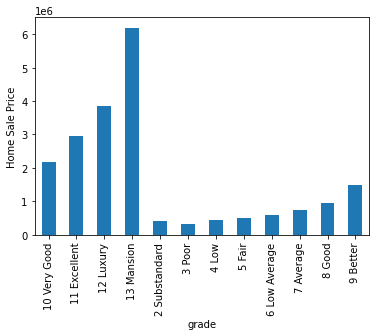

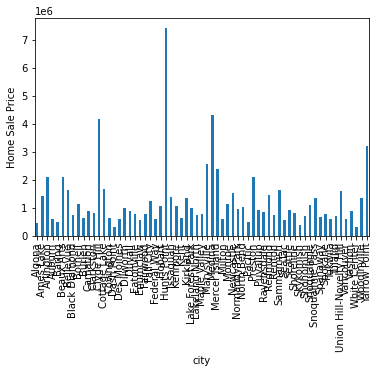

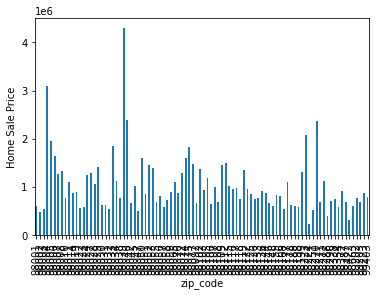

In [69]:
for feature in cat_features:
    data=sales_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Home Sale Price')
    plt.show()

## Data Modeling

### Simple Regression
For our simple regression model, we will be using sqft_living as it was the most correlated to our target.

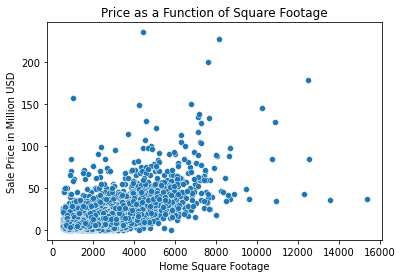

In [70]:
sns.scatterplot( x=sales_df['sqft_living'], y=sales_df['price']/100000)
plt.xlabel('Home Square Footage')
plt.ylabel('Sale Price in Million USD')
plt.title('Price as a Function of Square Footage');

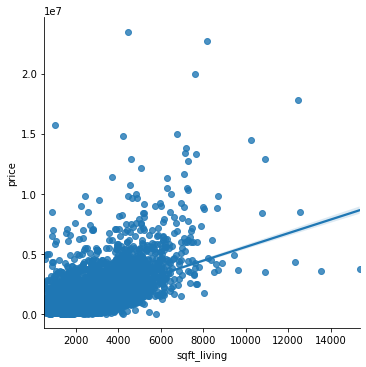

In [71]:
sns.lmplot(data=wa_only_df, x='sqft_living', y='price');

In [72]:
# simple model
Y = sales_df['price']
X = sm.add_constant(sales_df['sqft_living'])

wa_simple = sm.OLS(endog=Y, exog=X).fit()
wa_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.951e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:17:17   Log-Likelihood:            -4.3242e+05
No. Observations:               29128   AIC:                         8.648e+05
Df Residuals:                   29126   BIC:                         8.649e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.038e+05   9568.210    -10.851      0.000   -1.23e+05   -8.51e+04
sqft_living   569.3739      4.076    139.694      0.000     561.385     577.363
==============================================================================
Omnibus:                    35190.959   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13551393.547
Skew:                           6.082   Prob(JB):                         0.00
Kurtosis:                     107.965   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

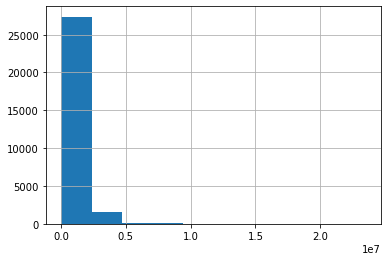

In [73]:
# looking at target distribution
Y.hist();

Our target is slightly right skewed, we will see how taking the log affects the distribution and model.

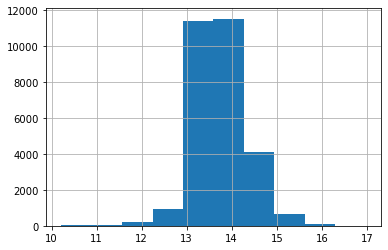

In [74]:
Y_log = np.log(Y)
Y_log.hist();

In [75]:
wa_simple_log = sm.OLS(endog=Y_log, exog=X).fit()
wa_simple_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:17:18   Log-Likelihood:                -18428.
No. Observations:               29128   AIC:                         3.686e+04
Df Residuals:                   29126   BIC:                         3.688e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9355      0.006   2011.153      0.000      12.923      12.948
sqft_living     0.0004   2.74e-06    137.278      0.000       0.000       0.000
==============================================================================
Omnibus:                     5967.618   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43956.560
Skew:                          -0.792   Prob(JB):                         0.00
Kurtosis:                       8.806   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There does not seem to be any improvement in the model after the log.

### Multiple Numerical Regression

In [96]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29128 non-null  object 
 1   price          29128 non-null  float64
 2   bedrooms       29128 non-null  int64  
 3   bathrooms      29128 non-null  float64
 4   sqft_living    29128 non-null  int64  
 5   floors         29128 non-null  float64
 6   waterfront     29128 non-null  object 
 7   view           29128 non-null  object 
 8   condition      29128 non-null  object 
 9   grade          29128 non-null  object 
 10  sqft_above     29128 non-null  int64  
 11  sqft_basement  29128 non-null  int64  
 12  sqft_garage    29128 non-null  int64  
 13  sqft_patio     29128 non-null  int64  
 14  city           29128 non-null  object 
 15  zip_code       29128 non-null  object 
 16  mortgage_rate  29128 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 5

In [97]:
# creating new dataframe with numeric colums
wa_num = sales_df.select_dtypes(include=['float','int64'])
wa_num

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,675000.00,4,1.00,1180,1.00,1180,0,0,40,5.23
1,920000.00,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,311000.00,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,775000.00,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,592500.00,2,2.00,1120,2.00,1120,550,550,30,2.84
...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,1600,1130,0,210,3.07
30151,1313000.00,3,2.00,2020,2.00,2020,0,0,520,2.98
30152,800000.00,3,2.00,1620,1.00,940,920,240,110,5.23
30153,775000.00,3,2.50,2570,2.00,1830,740,480,100,3.76


In [98]:
wa_num.describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
count,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00,29128.00
mean,1112255.98,3.44,2.34,2135.83,1.52,1829.81,482.37,337.22,216.77,3.52
std,875762.28,0.97,0.89,974.24,0.55,878.43,586.41,286.02,246.82,0.85
min,27360.00,0.00,0.00,510.00,1.00,300.00,0.00,0.00,0.00,2.84
25%,645000.00,3.00,2.00,1440.00,1.00,1190.00,0.00,0.00,40.00,2.90
50%,869000.00,3.00,2.50,1950.00,1.50,1580.00,0.00,400.00,150.00,3.07
75%,1310250.00,4.00,3.00,2640.00,2.00,2294.00,960.00,520.00,310.00,4.17
max,23500000.00,13.00,10.50,15360.00,4.00,12660.00,8020.00,3580.00,4370.00,5.52


In [99]:
# separting data frame into model variables
num_mlr_y = wa_num['price']
num_mlr_x = sm.add_constant(wa_num.drop('price', axis=1))
num_mlr_x.head()

,const,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,mortgage_rate
0,1.00,4,1.00,1180,1.00,1180,0,0,40,5.23
1,1.00,5,2.50,2770,1.00,1570,1570,0,240,3.10
2,1.00,6,2.00,2880,1.00,1580,1580,0,0,2.90
3,1.00,3,3.00,2160,2.00,1090,1070,200,270,3.10
4,1.00,2,2.00,1120,2.00,1120,550,550,30,2.84


<AxesSubplot:>

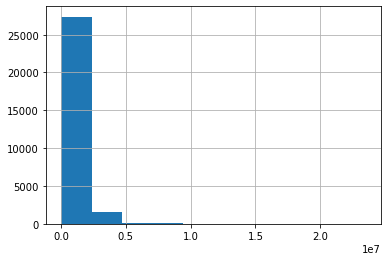

In [100]:
num_mlr_y.hist()

In [101]:
# multiple regression model on numeric variables
num_mlr = sm.OLS(endog=num_mlr_y, exog=num_mlr_x).fit()
num_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2567.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:22:43   Log-Likelihood:            -4.3138e+05
No. Observations:               29128   AIC:                         8.628e+05
Df Residuals:                   29118   BIC:                         8.629e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.519e+05   2.37e+04     -6.414      0.000   -1.98e+05   -1.05e+05
bedrooms      -1.491e+05   5254.222    -28.368      0.000   -1.59e+05   -1.39e+05
bathrooms      1.034e+05   7507.004     13.775      0.000    8.87e+04    1.18e+05
sqft_living     287.5729     17.393     16.534      0.000     253.482     321.664
floors        -9.665e+04   8902.295    -10.856      0.000   -1.14e+05   -7.92e+04
sqft_above      368.7033     17.583     20.969      0.000     334.239     403.168
sqft_basement   235.6980     12.619     18.678      0.000     210.964     260.432
sqft_garage    -290.0572     16.605    -17.468      0.000    -322.604    -257.510
sqft_patio      235.8452     17.171     13.735      0.000     202.188     269.502
mortgage_rate  9.272e+04   4516.263     20.531      0.000    8.39e+04    1.02e+05
==============================================================================
Omnibus:                    34689.307   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13497980.360
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                     107.795   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

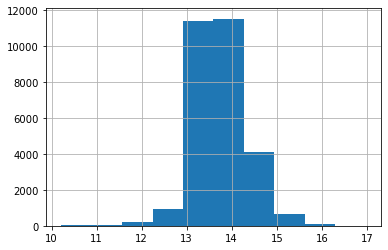

In [102]:
# log of target for second model transformation
num_mlr_y_log = np.log(num_mlr_y)
num_mlr_y_log.hist();

In [103]:
# num mlr model with y log
num_mlr_log = sm.OLS(endog=num_mlr_y_log, exog=num_mlr_x).fit()
num_mlr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     2411.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:22:52   Log-Likelihood:                -17585.
No. Observations:               29128   AIC:                         3.519e+04
Df Residuals:                   29118   BIC:                         3.527e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.6293      0.016    788.041      0.000      12.598      12.661
bedrooms         -0.0509      0.004    -14.306      0.000      -0.058      -0.044
bathrooms         0.0756      0.005     14.884      0.000       0.066       0.086
sqft_living       0.0002   1.18e-05     15.400      0.000       0.000       0.000
floors            0.0255      0.006      4.233      0.000       0.014       0.037
sqft_above        0.0002   1.19e-05     15.014      0.000       0.000       0.000
sqft_basement     0.0002   8.54e-06     17.982      0.000       0.000       0.000
sqft_garage      -0.0001   1.12e-05    -11.175      0.000      -0.000      -0.000
sqft_patio        0.0001   1.16e-05     12.218      0.000       0.000       0.000
mortgage_rate     0.0831      0.003     27.187      0.000       0.077       0.089
==============================================================================
Omnibus:                     6711.185   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54126.675
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                       9.438   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# assigning scaler
scaler = StandardScaler()

In [156]:
num_mlr_x = scaler.fit_transform(num_mlr_x)

In [157]:
num_mlr_x

array([[ 0.        ,  0.57456869, -1.49600533, ..., -1.1790065 ,
        -0.71621033,  2.01044384],
       [ 0.        ,  1.60593843,  0.18344751, ..., -1.1790065 ,
         0.09411852, -0.5000913 ],
       [ 0.        ,  2.63730818, -0.3763701 , ..., -1.1790065 ,
        -0.87827611, -0.73324607],
       ...,
       [ 0.        , -0.45680105, -0.3763701 , ..., -0.33989932,
        -0.43259523,  2.01044384],
       [ 0.        , -0.45680105,  0.18344751, ...,  0.49920787,
        -0.47311168,  0.28239022],
       [ 0.        , -0.45680105, -0.93618772, ...,  0.28943108,
        -0.87827611,  1.71900038]])

In [158]:
# log y and scaled x
num_mlr_scld= sm.OLS(num_mlr_y_log, num_mlr_x).fit()
num_mlr_scld.summary()

C:\Users\clara\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.499
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                     0.00746
Time:                        17:28:28   Log-Likelihood:                     -1.1767e+05
No. Observations:               29128   AIC:                                  2.354e+05
Df Residuals:                   29119   BIC:                                  2.354e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1            -0.0493      0.107     -0.461      0.645      -0.259       0.161
x2             0.0675      0.141      0.479      0.632      -0.209       0.344
x3             0.1766      0.356      0.496      0.620      -0.522       0.875
x4             0.0140      0.103      0.136      0.892      -0.187       0.215
x5             0.1569      0.325      0.483      0.629      -0.479       0.793
x6             0.0901      0.156      0.579      0.563      -0.215       0.395
x7            -0.0359      0.100     -0.360      0.719      -0.232       0.160
x8             0.0350      0.089      0.393      0.694      -0.140       0.210
x9             0.0706      0.081      0.875      0.381      -0.087       0.229
==============================================================================
Omnibus:                     6711.185   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54126.675
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                       9.438   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
# scaled x only
num_mlr_scld2= sm.OLS(num_mlr_y, num_mlr_x).fit()
num_mlr_scld2.summary()

C:\Users\clara\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.169
Model:                            OLS   Adj. R-squared (uncentered):              0.169
Method:                 Least Squares   F-statistic:                              659.4
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:17:20   Log-Likelihood:                     -4.5117e+05
No. Observations:               29128   AIC:                                  9.024e+05
Df Residuals:                   29119   BIC:                                  9.024e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1         -1.445e+05   1.01e+04    -14.378      0.000   -1.64e+05   -1.25e+05
x2          9.236e+04   1.32e+04      6.982      0.000    6.64e+04    1.18e+05
x3          2.802e+05   3.34e+04      8.380      0.000    2.15e+05    3.46e+05
x4         -5.305e+04   9641.648     -5.502      0.000    -7.2e+04   -3.42e+04
x5          3.239e+05   3.05e+04     10.628      0.000    2.64e+05    3.84e+05
x6          1.382e+05   1.46e+04      9.467      0.000     1.1e+05    1.67e+05
x7         -8.296e+04   9370.654     -8.853      0.000   -1.01e+05   -6.46e+04
x8          5.821e+04   8361.893      6.961      0.000    4.18e+04    7.46e+04
x9          7.874e+04   7567.112     10.406      0.000    6.39e+04    9.36e+04
==============================================================================
Omnibus:                    34689.307   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13497980.360
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                     107.795   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The model Adjusted R 

### Categorical Features Models

In [174]:
dummy_sales_df = sales_df
dummy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 30154
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           29128 non-null  object 
 1   price          29128 non-null  float64
 2   bedrooms       29128 non-null  int64  
 3   bathrooms      29128 non-null  float64
 4   sqft_living    29128 non-null  int64  
 5   floors         29128 non-null  float64
 6   waterfront     29128 non-null  object 
 7   view           29128 non-null  object 
 8   condition      29128 non-null  object 
 9   grade          29128 non-null  object 
 10  sqft_above     29128 non-null  int64  
 11  sqft_basement  29128 non-null  int64  
 12  sqft_garage    29128 non-null  int64  
 13  sqft_patio     29128 non-null  int64  
 14  city           29128 non-null  object 
 15  zip_code       29128 non-null  object 
 16  mortgage_rate  29128 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 5

In [175]:
dummy_sales_df = dummy_sales_df.drop(columns=['date', 'city', 'sqft_garage'])

In [176]:
dummy_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29128 non-null  float64
 1   bedrooms       29128 non-null  int64  
 2   bathrooms      29128 non-null  float64
 3   sqft_living    29128 non-null  int64  
 4   floors         29128 non-null  float64
 5   waterfront     29128 non-null  object 
 6   view           29128 non-null  object 
 7   condition      29128 non-null  object 
 8   grade          29128 non-null  object 
 9   sqft_above     29128 non-null  int64  
 10  sqft_basement  29128 non-null  int64  
 11  sqft_patio     29128 non-null  int64  
 12  zip_code       29128 non-null  object 
 13  mortgage_rate  29128 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 4.6+ MB


In [210]:
# condition dummy, drops 'Average'
cat_dummies = pd.get_dummies(dummy_sales_df, drop_first=True)
cat_dummies

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_patio,mortgage_rate,waterfront_YES,...,zip_code_98338,zip_code_98354,zip_code_98372,zip_code_98387,zip_code_98422,zip_code_98663,zip_code_99202,zip_code_99203,zip_code_99223,zip_code_99403
0,675000.00,4,1.00,1180,1.00,1180,0,40,5.23,0,...,0,0,0,0,0,0,0,0,0,0
1,920000.00,5,2.50,2770,1.00,1570,1570,240,3.10,0,...,0,0,0,0,0,0,0,0,0,0
2,311000.00,6,2.00,2880,1.00,1580,1580,0,2.90,0,...,0,0,0,0,0,0,0,0,0,0
3,775000.00,3,3.00,2160,2.00,1090,1070,270,3.10,0,...,0,0,0,0,0,0,0,0,0,0
4,592500.00,2,2.00,1120,2.00,1120,550,30,2.84,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.00,5,2.00,1910,1.50,1600,1130,210,3.07,0,...,0,0,0,0,0,0,0,0,0,0
30151,1313000.00,3,2.00,2020,2.00,2020,0,520,2.98,0,...,0,0,0,0,0,0,0,0,0,0
30152,800000.00,3,2.00,1620,1.00,940,920,110,5.23,0,...,0,0,0,0,0,0,0,0,0,0
30153,775000.00,3,2.50,2570,2.00,1830,740,100,3.76,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# water dummy, drops NO
# view dummy, drops AVERAGE
# condition dummy, drops AVERAGE
# grade dummy, drops 10 Very Good
# zip dummy, drops 98001

In [202]:
col_list = list(cat_dummies.columns)

In [207]:
if 'zip_code_98001' in col_list:
    print('not success')

In [230]:
y = cat_dummies['price']
x = sm.add_constant(cat_dummies.drop('price', axis=1))
cat_model = sm.OLS(endog=y, exog=x).fit()
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     625.9
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:16:58   Log-Likelihood:            -4.2136e+05
No. Observations:               29128   AIC:                         8.430e+05
Df Residuals:                   29008   BIC:                         8.440e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.423e+04   3.51e+04      2.113      0.035    5360.673    1.43e+05
bedrooms             -1.93e+04   3967.017     -4.866      0.000   -2.71e+04   -1.15e+04
bathrooms            5.227e+04   5399.810      9.679      0.000    4.17e+04    6.28e+04
sqft_living           107.8491     12.659      8.520      0.000      83.037     132.661
floors              -7.977e+04   7337.212    -10.872      0.000   -9.42e+04   -6.54e+04
sqft_above            231.1788     12.450     18.568      0.000     206.776     255.582
sqft_basement          67.9392      9.496      7.155      0.000      49.327      86.551
sqft_patio             73.1805     12.624      5.797      0.000      48.438      97.923
mortgage_rate        9.649e+04   3217.166     29.992      0.000    9.02e+04    1.03e+05
waterfront_YES       7.268e+05   2.53e+04     28.677      0.000    6.77e+05    7.76e+05
view_EXCELLENT       6.697e+05   2.57e+04     26.084      0.000    6.19e+05     7.2e+05
view_FAIR            8.855e+04   3.38e+04      2.624      0.009    2.24e+04    1.55e+05
view_GOOD            7.407e+04   1.93e+04      3.843      0.000    3.63e+04    1.12e+05
view_NONE           -9.612e+04   1.17e+04     -8.210      0.000   -1.19e+05   -7.32e+04
condition_Fair      -1.437e+05   3.19e+04     -4.507      0.000   -2.06e+05   -8.12e+04
condition_Good       4.462e+04   6673.052      6.687      0.000    3.15e+04    5.77e+04
condition_Poor      -7.409e+04   6.43e+04     -1.153      0.249      -2e+05    5.19e+04
condition_Very Good  1.059e+05   9340.887     11.334      0.000    8.76e+04    1.24e+05
grade_11 Excellent   5.627e+05    2.7e+04     20.876      0.000     5.1e+05    6.16e+05
grade_12 Luxury      1.516e+06   4.55e+04     33.320      0.000    1.43e+06     1.6e+06
grade_13 Mansion     3.113e+06    9.9e+04     31.456      0.000    2.92e+06    3.31e+06
grade_2 Substandard -7478.0596   4.71e+05     -0.016      0.987    -9.3e+05    9.15e+05
grade_3 Poor        -4.419e+05   2.13e+05     -2.078      0.038   -8.59e+05   -2.52e+04
grade_4 Low         -3.944e+05   8.49e+04     -4.645      0.000   -5.61e+05   -2.28e+05
grade_5 Fair        -3.271e+05   3.18e+04    -10.292      0.000   -3.89e+05   -2.65e+05
grade_6 Low Average -3.455e+05   2.07e+04    -16.683      0.000   -3.86e+05   -3.05e+05
grade_7 Average     -4.049e+05   1.76e+04    -23.010      0.000   -4.39e+05    -3.7e+05
grade_8 Good        -3.626e+05    1.6e+04    -22.711      0.000   -3.94e+05   -3.31e+05
grade_9 Better      -2.016e+05   1.56e+04    -12.888      0.000   -2.32e+05   -1.71e+05
zip_code_98002       2.804e+04   3.08e+04      0.909      0.363   -3.24e+04    8.85e+04
zip_code_98003       2.308e+04    2.9e+04      0.795      0.426   -3.38e+04    7.99e+04
zip_code_98004       2.204e+06   3.25e+04     67.795      0.000    2.14e+06    2.27e+06
zip

In [224]:
print(cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     625.9
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:15:38   Log-Likelihood:            -4.2136e+05
No. Observations:               29128   AIC:                         8.430e+05
Df Residuals:                   29008   BIC:                         8.440e+05
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.423e+04   3

<AxesSubplot:>

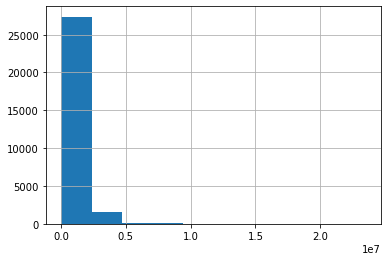

In [225]:
y.hist()

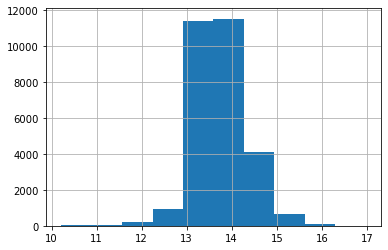

In [226]:
y_log = np.log(y)
y_log.hist();

In [240]:
x_scaled = (x - np.mean(x)) / np.std(x)
x_scaled

array([[ 3.51927088e-18,  5.76977794e-01, -1.50227792e+00, ...,
        -5.88395394e-03, -5.88395394e-03, -5.88395394e-03],
       [ 3.51927088e-18,  1.61267196e+00,  1.84216688e-01, ...,
        -5.88395394e-03, -5.88395394e-03, -5.88395394e-03],
       [ 3.51927088e-18,  2.64836612e+00, -3.77948182e-01, ...,
        -5.88395394e-03, -5.88395394e-03, -5.88395394e-03],
       ...,
       [ 3.51927088e-18, -4.58716369e-01, -3.77948182e-01, ...,
        -5.88395394e-03, -5.88395394e-03, -5.88395394e-03],
       [ 3.51927088e-18, -4.58716369e-01,  1.84216688e-01, ...,
        -5.88395394e-03, -5.88395394e-03, -5.88395394e-03],
       [ 3.51927088e-18, -4.58716369e-01, -9.40113051e-01, ...,
        -5.88395394e-03, -5.88395394e-03, -5.88395394e-03]])

In [237]:
x2 = cat_dummies.drop('price', axis=1)
x2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_patio,mortgage_rate,waterfront_YES,view_EXCELLENT,...,zip_code_98338,zip_code_98354,zip_code_98372,zip_code_98387,zip_code_98422,zip_code_98663,zip_code_99202,zip_code_99203,zip_code_99223,zip_code_99403
0,4,1.00,1180,1.00,1180,0,40,5.23,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2.50,2770,1.00,1570,1570,240,3.10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,2.00,2880,1.00,1580,1580,0,2.90,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3.00,2160,2.00,1090,1070,270,3.10,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2.00,1120,2.00,1120,550,30,2.84,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,5,2.00,1910,1.50,1600,1130,210,3.07,0,0,...,0,0,0,0,0,0,0,0,0,0
30151,3,2.00,2020,2.00,2020,0,520,2.98,0,0,...,0,0,0,0,0,0,0,0,0,0
30152,3,2.00,1620,1.00,940,920,110,5.23,0,0,...,0,0,0,0,0,0,0,0,0,0
30153,3,2.50,2570,2.00,1830,740,100,3.76,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
scaler = StandardScaler()

In [234]:
x2 = scaler.fit_transform(x2)
x2

array([[ 0.57456869, -1.49600533, -0.98111228, ..., -0.00585939,
        -0.00585939, -0.00585939],
       [ 1.60593843,  0.18344751,  0.65095234, ..., -0.00585939,
        -0.00585939, -0.00585939],
       [ 2.63730818, -0.3763701 ,  0.76386247, ..., -0.00585939,
        -0.00585939, -0.00585939],
       ...,
       [-0.45680105, -0.3763701 , -0.52947175, ..., -0.00585939,
        -0.00585939, -0.00585939],
       [-0.45680105,  0.18344751,  0.44566119, ..., -0.00585939,
        -0.00585939, -0.00585939],
       [-0.45680105, -0.93618772, -0.96058316, ..., -0.00585939,
        -0.00585939, -0.00585939]])

In [242]:
predictors = sm.add_constant(x_scaled)

In [243]:
updated_model = sm.OLS(endog=y_log, exog=predictors).fit()
updated_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                    -551.538
Model:                            OLS   Adj. R-squared:               -553.785
Method:                 Least Squares   F-statistic:                    -245.4
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               1.00
Time:                        18:32:19   Log-Likelihood:            -1.1766e+05
No. Observations:               29128   AIC:                         2.356e+05
Df Residuals:                   29009   BIC:                         2.365e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -1.66e-18   5.45e-17     -0.030      0.976   -1.09e-16    1.05e-16
x2             0.0070      0.114      0.062      0.951      -0.216       0.230
x3             0.0291      0.142      0.205      0.838      -0.250       0.308
x4             0.0842      0.364      0.231      0.817      -0.629       0.798
x5            -0.0304      0.119     -0.255      0.798      -0.263       0.203
x6             0.1255      0.323      0.389      0.697      -0.507       0.758
x7             0.0151      0.164      0.092      0.927      -0.307       0.337
x8             0.0120      0.092      0.131      0.896      -0.168       0.192
x9             0.0705      0.081      0.875      0.382      -0.088       0.229
x10            0.0342      0.097      0.352      0.725      -0.156       0.224
x11            0.0309      0.102      0.302      0.763      -0.170       0.231
x12            0.0046      0.085      0.054      0.957      -0.162       0.171
x13            0.0088      0.097      0.091      0.928      -0.181       0.198
x14           -0.0324      0.112     -0.288      0.773      -0.253       0.188
x15           -0.0090      0.082     -0.110      0.912      -0.169       0.151
x16            0.0297      0.088      0.337      0.736      -0.143       0.202
x17           -0.0071      0.083     -0.086      0.932      -0.170       0.156
x18            0.0407      0.087      0.469      0.639      -0.130       0.211
x19            0.0068      0.093      0.074      0.941      -0.175       0.189
x20            0.0003      0.087      0.003      0.997      -0.170       0.170
x21           -0.0078      0.084     -0.094      0.925      -0.172       0.156
x22           -0.0017      0.081     -0.020      0.984      -0.161       0.158
x23           -0.0100      0.082     -0.122      0.903      -0.171       0.151
x24           -0.0157      0.083     -0.189      0.850      -0.178       0.147
x25           -0.0423      0.102     -0.413      0.679      -0.243       0.158
x26           -0.1018      0.181     -0.562      0.574      -0.457       0.253
x27           -0.1300      0.254     -0.512      0.609      -0.628       0.368
x28           -0.0737      0.217     -0.340      0.734      -0.499       0.351
x29           -0.0127      0.152     -0.083      0.934      -0.310       0.285
x30           -0.0110      0.101     -0.109      0.914      -0.209       0.187
x31           -0.0047      0.104     -0.045      0.964      -0.209       0.200
x32            0.1213      0.100      1.209      0.227      -0.075       0.318
x33            0.0677      0.092      0.739      0.460      -0.112       0.247
x34            0.0965      0.110      0.878      0.380      -0.119       0.312
x35            0.0535      0.090      0.596      0.551      -0.122       0.229
x36            0.0871      0.103      0.848      0.396      -0.114       0.288
x3

In [133]:
updated_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,12.7892,0.023,546.271,0.000,12.743,12.835
bedrooms,0.0073,0.003,2.744,0.006,0.002,0.012
bathrooms,0.0328,0.004,9.105,0.000,0.026,0.040
sqft_living,8.682e-05,8.43e-06,10.293,0.000,7.03e-05,0.000
floors,-0.0556,0.005,-11.363,0.000,-0.065,-0.046
sqft_above,0.0001,8.3e-06,17.291,0.000,0.000,0.000
sqft_basement,2.583e-05,6.33e-06,4.083,0.000,1.34e-05,3.82e-05
sqft_patio,4.894e-05,8.41e-06,5.819,0.000,3.25e-05,6.54e-05
mortgage_rate,0.0834,0.002,38.912,0.000,0.079,0.088
waterfront_YES,0.2646,0.017,15.672,0.000,0.232,0.298


In [146]:
dummy_corr = updated_dummies.corr()['price'].map(abs).sort_values(ascending=False)
dummy_corr.head(30)

price                 1.00
sqft_living           0.63
sqft_above            0.56
bathrooms             0.50
sqft_patio            0.32
grade_11 Excellent    0.32
zip_code_98004        0.31
bedrooms              0.30
grade_12 Luxury       0.29
view_EXCELLENT        0.29
view_NONE             0.28
grade_7 Average       0.27
sqft_basement         0.25
waterfront_YES        0.24
zip_code_98039        0.22
grade_9 Better        0.22
grade_13 Mansion      0.21
zip_code_98040        0.20
floors                0.20
grade_6 Low Average   0.17
zip_code_98033        0.15
view_GOOD             0.13
zip_code_98006        0.12
zip_code_98075        0.11
zip_code_98112        0.10
zip_code_98042        0.09
zip_code_98005        0.09
zip_code_98023        0.09
zip_code_98074        0.08
zip_code_98002        0.08
Name: price, dtype: float64

. Exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%.

In [139]:
print(f"""
A one-unit increase in the square feet corresponds
to an increase in price by a factor of {round(np.exp(0.00008682), 3)},
or {100 * round(np.exp(0.00008682) - 1, 3)}%.
""")


A one-unit increase in the square feet corresponds
to an increase in price by a factor of 1.0,
or 0.0%.



In [147]:
y_preds = updated_model.predict(x2)

<AxesSubplot:>

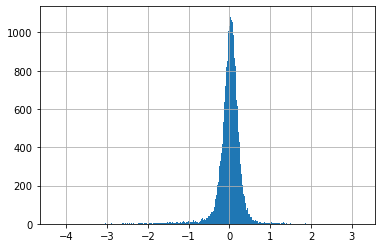

In [152]:
reds = y2_log - y_preds
reds.hist(bins='auto')

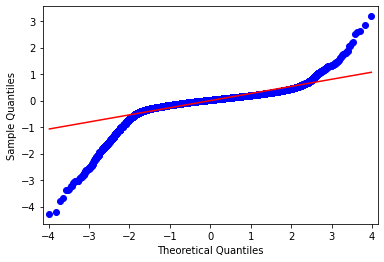

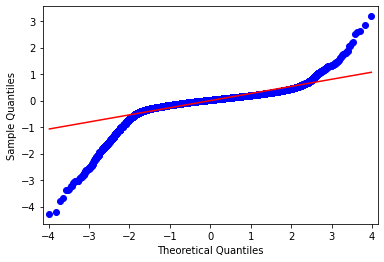

In [154]:
sm.qqplot(data=reds, line='r')

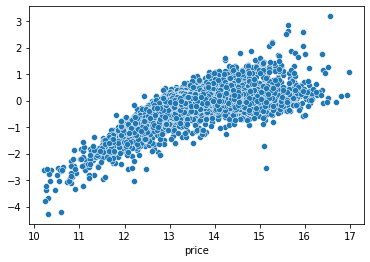

In [155]:
sns.scatterplot(y=reds, x=y2_log);

## Evaluation


## Conclusions


## Next Steps